In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = pd.read_csv('appliance_energy.csv')

print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


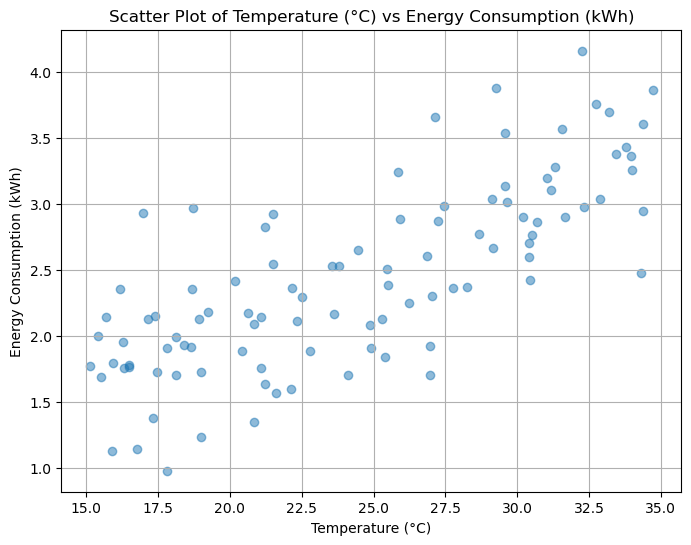

In [26]:
x = df['Temperature (°C)']
y = df['Energy Consumption (kWh)']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5) 
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Temperature (°C) vs Energy Consumption (kWh)')
plt.grid(True)  
plt.show()

In [27]:
#describe the data
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [28]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [30]:
X = df.drop('Energy Consumption (kWh)', axis=1)  
y = df['Energy Consumption (kWh)']  

In [31]:
xtrain ,xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
xtrain.head()

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739


In [43]:
ytrain.head()

55    3.378030
88    3.756114
26    1.727990
42    2.140188
69    3.864685
Name: Energy Consumption (kWh), dtype: float64

In [41]:
model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

In [47]:
print("Slope : ", model.coef_)
print("y_intercept :", model.intercept_)

Slope :  [0.08996618]
y_intercept : 0.22196391661907766


In [48]:
ypred = model.predict(xtest)

In [49]:
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.16342487842925058


In [50]:
r2 = r2_score(ytest, ypred)
print(f"R-squared: {r2}")

R-squared: 0.6119478445218713


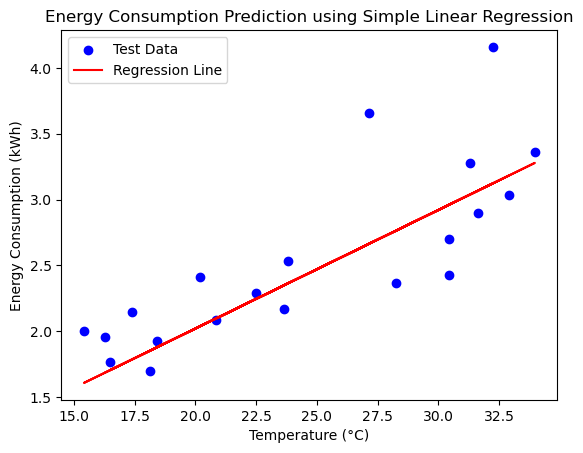

In [52]:
# Plot the test data and regression line
plt.scatter(xtest, ytest, color='blue', label='Test Data')  # Actual data
plt.plot(xtest, ypred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [54]:
import joblib
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [61]:
import joblib

loaded_model = joblib.load('appliance_energy_model.pkl')

temp = np.array([[22]])

prediction = loaded_model.predict(temp)

print(f"Predicted energy consumption for the given temperature: {prediction} kWh")

Predicted energy consumption for the given temperature: [2.20121994] kWh
